# Assignment 7

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

$$ z = W^{T} * X + b$$

$$ a = sigmoid(z) $$

####  2. Why we use non-linear activation funcitons in neural networks?

答：因为如果只用线性激活函数，这种情况下每一层输出都是上层输入的线性函数，不管神经网络有多少层，输出都是输入的线性组合，都可以转换成一次线性变换，与没有隐藏层效果相当。

#### 3. What is the 'Logistic Loss' ?

$$P(y|x) =  y\_hat^{y}*(1 - y\_hat)^{1-y} $$

$$L = -1/m*\Sigma log(P(y|x) = -1/m*\Sigma ( y*log(y\_hat) + (1 - y)*log(1-y\_hat))$$

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommend using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

答：C

#### 5. Why we don't use zero initialization for all parameters ?

如果w初始化为0，“所有的神经元在做同样的事情，会大大减弱模型的表达能力”，模型在反向传播时候梯度更新一样，最后模型会学不到东西

#### 6. Can you implement the softmax function using python ? 

In [31]:
def softmax(x):
#     对x中每个数值求e^x
    e_x = np.exp(x)
    return e_x / e_x.sum(axis = 0)

****
实现一个softmax函数，观察一个向量经过softmax函数之后，最大值于最小值比例的变化，最大值于第二大值比例的变化，最小值于第二小值比例的变化

In [46]:
def func(x):
    sum = np.sum(x)
    return x/np.sum(x, axis=0)

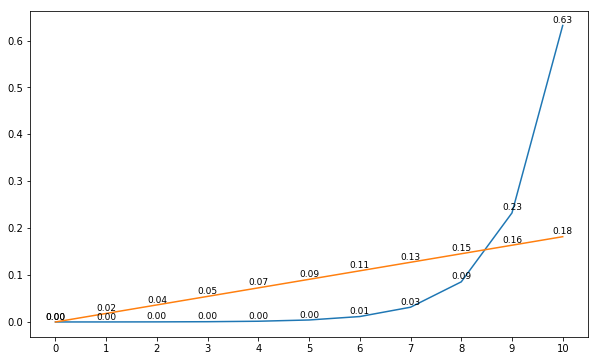

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化x向量 
x = np.linspace(0, 10, num=11)
# 调用定义的softmax返回softmax后的结果
y = softmax(x)
# 调用定义的func返回原始x占比的结果
y_orig = func(x)


plt.figure(figsize=(10,6))
for a,b in zip(x, y):
    plt.text(a, b+0.001, '%.2f' % b, ha='center', va= 'bottom',fontsize=9)
for a,b2 in zip(x, y_orig):
    plt.text(a, b2+0.001, '%.2f' % b2, ha='center', va= 'bottom',fontsize=9)
plt.xticks(x)
plt.plot(x,y)
plt.plot(x,y_orig)
plt.show()

+ 最大值与最小值比例的变化
    + 最大值为10 从原先占比0.18变成0.63 急剧上升
+ 最大值与第二大值比例的变化
    + 最大值和第二大值原先比例只相差一点点（0.02） 变化后相差有0.4
+ 最小值与第二小值比例的变化
    + 最小值与第二小值原先比例相差不大，变化后基本都为0

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overview of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - each image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [176]:
# Loading the data 
digits = datasets.load_digits()

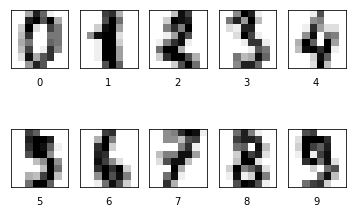

In [5]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [177]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [178]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [179]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [60]:
!pwd

/Users/maytone/Documents/material/后厂理工课/git/NLP_Study_2020/核心课/assignment7


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [129]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1 + np.exp(-z))
    
    return s

In [109]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [130]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,1)
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [236]:
import numpy as np
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
#     m为训练样本数
    m = X.shape[1]
#     [1,64]*[64,1347] -> [1,1347]
#     print("w.T",w.shape)
#     print("X is",X.shape)
#     print("b is",b)
    A = sigmoid(np.dot(w.T, X) + b)
#     print("propagate A.shape is",A.shape)
#     [1347,] * [1,1347]
    cost = (-1./m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) 
#     print("cost is", cost)
    
#     dw = [64,1347] * [1347,1] -> [64,1]
    dw = (1. / m) * np.dot(X, (A - Y).T)
    db = 1./m * np.sum(A - Y)
    
#     print("dw.shape",dw.shape)
#     print("db",db)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [232]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        # w,b更新
        w = w - 1 * learning_rate * dw
        b = b - 1 * learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [233]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
#     m为预测样本数量
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    
#     w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [270]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
#     初始化w,b 参数
    w,b = initialize_parameters(X_train.shape[0])
    
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
       
    w_out = params['w']
    b_out = params['b']
    
    prediction_test = predict(w, b, X_test)
    test_accuracy = 100 - np.mean(np.abs(prediction_test - Y_test)) * 100
    return costs, prediction_test,test_accuracy


In [277]:
num_iterations = 5000
learning_rate = 0.001
print_cost = False


X_train2 = X_train.reshape((X_train.shape[1], X_train.shape[0]))/255.
X_test2 = X_test.reshape((X_test.shape[1], X_test.shape[0]))/255.

y_train2 = y_train.reshape((1, y_train.shape[0]))
y_test2 = y_test.reshape((1, y_test.shape[0]))

print("X_train.shape is",X_train2.shape)
print("X_test.shape is",X_test2.shape)
print("y_train.shape is",y_train2.shape)
print("y_test.shape is",y_test2.shape)


train_costs, Y_prediction, test_accuracy = model(X_train2, y_train2, X_test2, y_test2, num_iterations, learning_rate, print_cost)

X_train.shape is (64, 1347)
X_test.shape is (64, 450)
y_train.shape is (1, 1347)
y_test.shape is (1, 450)


### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

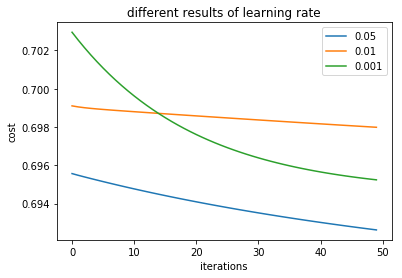

In [278]:
learning_rates = [0.05,0.01, 0.001]

for i in learning_rates:
    train_costs, _,_ = model(X_train2, y_train2, X_test2, y_test2, num_iterations, i, print_cost)
    costs = np.squeeze(train_costs)
    plt.plot(costs, label= str(i))

plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("different results of learning rate")

legend = plt.legend()
plt.show()

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [280]:
num_iterations = [500,5000, 10000]

for num_iteration in num_iterations:
    _, _ , test_accuracy = model(X_train2, y_train2, X_test2, y_test2, num_iteration, learning_rate, print_cost)
    print(test_accuracy)

47.111111111111114
49.111111111111114
52.0


随着iteration_num的增加，test accuracy也会增加，但是增加有限，会过拟合。这里test_accuracy比较低，可能模型太浅的关系

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.